## 01 - Carga, entendimiento y limpieza de datos

En este notebook se llevará a cabo la primera fase del análisis de datos, centrada en la carga, comprensión y limpieza del conjunto de datos. El objetivo de esta etapa es preparar los datos para el análisis posterior, asegurándonos de que la información esté limpia, coherente y lista para ser procesada.

Las actividades que se realizarán incluyen:

1. **Carga de los datos:** Importaremos el conjunto de datos desde su fuente original para trabajar con él en el entorno adecuado.
2. **Exploración y entendimiento:** Analizaremos las primeras filas del dataset, las estadísticas descriptivas y los tipos de variables para comprender la estructura y el contenido de los datos.
3. **Limpieza de los datos:** Detectaremos y trataremos los valores nulos, duplicados, outliers y cualquier inconsistencia en los datos que pueda afectar al análisis.
4. **Ingeniería de características:** En caso de ser necesario, crearemos nuevas características o transformaremos las existentes para mejorar la calidad y utilidad de los datos.

Esta fase es crucial para asegurarnos de que los datos estén listos para el análisis exploratorio de datos (EDA) y la construcción de modelos predictivos en fases posteriores del proyecto.

Empezamos cargando las librerías necesarias y los datos

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("../data/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Como primer paso, trataremos de entender los datos que tenemos

In [3]:
df.shape

(2240, 29)

Tenemos 2240 filas (clientes) y 29 columnas (características)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### **Descripción de las variables:**

**Información del cliente:**

- **ID**: Identificador único del cliente  
- **Year_Birth**: Año de nacimiento del cliente  
- **Education**: Nivel educativo del cliente  
- **Marital_Status**: Estado civil del cliente  
- **Income**: Ingreso anual del hogar del cliente  
- **Kidhome**: Número de niños en el hogar del cliente  
- **Teenhome**: Número de adolescentes en el hogar del cliente  
- **Dt_Customer**: Fecha de alta del cliente en la empresa  
- **Recency**: Número de días desde la última compra del cliente  
- **Complain**: 1 si el cliente presentó una queja en los últimos 2 años, 0 en caso contrario  

**Gastos del cliente los dos últimos años:**

- **MntWines**: Monto gastado en vino en los últimos 2 años  
- **MntFruits**: Monto gastado en frutas en los últimos 2 años  
- **MntMeatProducts**: Monto gastado en carne en los últimos 2 años  
- **MntFishProducts**: Monto gastado en pescado en los últimos 2 años  
- **MntSweetProducts**: Monto gastado en dulces en los últimos 2 años  
- **MntGoldProds**: Monto gastado en productos de oro en los últimos 2 años  

**Canales y Frecuencia de Compra:**

- **NumDealsPurchases**: Número de compras realizadas con descuento  
- **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa  
- **NumCatalogPurchases**: Número de compras realizadas mediante catálogo  
- **NumStorePurchases**: Número de compras realizadas directamente en tiendas  
- **NumWebVisitsMonth**: Número de visitas al sitio web de la empresa en el último mes  

**Participación en Campañas de Marketin:**

- **AcceptedCmp1**: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario  
- **AcceptedCmp2**: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario  
- **AcceptedCmp3**: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario  
- **AcceptedCmp4**: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario  
- **AcceptedCmp5**: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario  
- **Response**: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario  


Podemos observar que hay un gran número de variables y además muchas parecidas, por lo que habrá que aplicar ingeniería de carcaterísticas para transformarlas y reducir el número de variables para que el modelo de clustering funcione mejor. Antes de eso, trataremos duplicados y nulos:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]

Income    24
dtype: int64

In [8]:
round((df.isnull().mean() * 100)[df.isnull().sum() > 0],2)

Income    1.07
dtype: float64

Podemos observar que no existen valores duplicados en el conjunto de datos. Sin embargo, sí se detectan valores nulos, concentrados únicamente en una variable. Dado que representan aproximadamente un 1% del total de observaciones, y considerando que esta proporción es baja, podemos optar por eliminar directamente esas filas sin comprometer significativamente la integridad del análisis.

In [9]:
df = df.dropna(subset="Income")

In [10]:
df.shape

(2216, 29)

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Ya tenemos lista la limpieza de nulos, podemos seguir con la **ingeniería de características:**

Antes, trataremos de ver los niveles de las variables categóricas, ``Dt_Customer`` no es object si no date, la cambiaremos para que no afecte nuestro análisis:

In [12]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [13]:
df.Dt_Customer.dtype

dtype('<M8[ns]')

In [14]:
cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(df[col].value_counts())
    print("---" * 10)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
------------------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
------------------------------



Los cambios que podemos realizar son: 

- Crear la nueva columna `Age` a partir de `Year_Birth`, ya que la edad es una variable más directa, interpretable y útil para segmentar que el año de nacimiento.

- Calcular la antigüedad del cliente en días a partir de `Dt_Customer`, para convertir una fecha en una variable numérica que refleje lealtad o tiempo de relación con la marca.

- Unificar las variables `Kidhome` y `Teenhome` en `Total_Children`, simplificando así la información sobre la carga familiar en una única métrica.

- Agrupar los 8 niveles de `Marital_Status` en solo dos: "Single" o "Partnered", lo que reduce la dimensionalidad y capta mejor el impacto del estado civil en el comportamiento de compra.

- Crear una variable de carga familiar combinando `Marital_Status` y `Total_Children`, representando de manera más completa el contexto familiar del cliente.

- Reducir los 5 niveles de `Education` a 3, para evitar categorías con poca representación y facilitar la interpretación.

- Crear una variable general de gasto `Total_Spent` sumando el gasto en las distintas categorías, lo que permite identificar fácilmente el valor total del cliente.

- Convertir los gastos en productos concretos (`MntWines`, `MntFruits`, etc.) en proporciones respecto al gasto total, lo que ayuda a entender preferencias sin depender del gasto absoluto.

- Calcular la proporción de gasto en cada canal (web, tienda física, catálogo), para detectar los canales preferidos por cada cliente.

- Evaluar la sensibilidad al precio comparando las compras con descuento (`NumDealsPurchases`) respecto al total de compras, útil para segmentar clientes sensibles a promociones.

- Crear una variable de frecuencia de compra mensual, que nos indica qué tan activo es un cliente en términos de compras.

- Crear `WebConversionRate` como la tasa de conversión web (compras realizadas tras visitas), para analizar la eficacia del canal digital en cada cliente.

- Crear una variable `Campaigns_Accepted` que sume todas las campañas aceptadas, reduciendo las 6 variables individuales actuales a una sola más clara y útil.


Procedemos a aplicar los cambios de 1 en 1:

In [ ]:
# Creación de Age (Utiilizaremos la fecha del último dato de alta)
max_date = df['Dt_Customer'].max()
min_date = df['Dt_Customer'].min()
df["Age"] = max_date.year - df["Year_Birth"]

# Creación de Customer_Days (Días de antiguedad del cliente)
df["Customer_Days"] = (max_date - df["Dt_Customer"]).dt.days

# Creación de Total_Children
df["Total_Children"] = df["Teenhome"] + df["Kidhome"]

# Modificación de los niveles de Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partnered', 
    'Together': 'Partnered', 
    'Divorced': 'Single', 
    'Widow': 'Single', 
    'Alone': 'Single', 
    'Absurd': 'Single', 
    'YOLO': 'Single'
})

# Creación de variable Family_Load (Sumar hijos en casa + partner si tiene)
df['Family_Load'] = (df['Marital_Status'] == 'Partnered').astype(int) + df['Total_Children']

# Modificar los niveles de Education
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

# Crear variable Total_Spent con la suma de gasto en productos alimenticios
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Proproción de gasto en productos
df['Total_Spent_NonZero'] = df['Total_Spent'].replace(0, 1)

df['Prop_Wines'] = df['MntWines'] / df['Total_Spent_NonZero']
df['Prop_Fruits'] = df['MntFruits'] / df['Total_Spent_NonZero']
df['Prop_Meat'] = df['MntMeatProducts'] / df['Total_Spent_NonZero']
df['Prop_Fish'] = df['MntFishProducts'] / df['Total_Spent_NonZero']
df['Prop_Sweet'] = df['MntSweetProducts'] / df['Total_Spent_NonZero']
df['Prop_Gold'] = df['MntGoldProds'] / df['Total_Spent_NonZero']

# Proporción de gasto en canales y sensibilidad al precio
df["Total_Purchases"] = df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"]].sum(axis=1)
df['Total_Purchases_NonZero'] = df['Total_Purchases'].replace(0, 1)

df['Prop_Web_Purchases'] = df['NumWebPurchases'] / df['Total_Purchases_NonZero']
df['Prop_Catalog_Purchases'] = df['NumCatalogPurchases'] / df['Total_Purchases_NonZero']
df['Prop_Store_Purchases'] = df['NumStorePurchases'] / df['Total_Purchases_NonZero']
df['Price_Sensitivity'] = df['NumDealsPurchases'] / df['Total_Purchases_NonZero']

# Crear frecuencia de compra mensual (filtramos valores bajos de custoemr days para que no haya alteraciones)
df['Monthly_Purchase_Frequency'] = df["Total_Purchases"] / (df['Customer_Days'].clip(lower=30) / 30)


# Crear Web_Conversion_rate con el porcentaje de conversion en la web, tener en cuenta que si numwebvisitsmonth es 0 daría error
df["Web_Conversion_Rate"] = df["NumWebPurchases"] / df['NumWebVisitsMonth'].replace(0, 1)

# Crear Campaigns_Accepted
df['Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Eliminar columnas temporales usadas para cálculos intermedios
df.drop(['Total_Spent_NonZero', 'Total_Purchases_NonZero'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2216 non-null   int64         
 1   Year_Birth                  2216 non-null   int64         
 2   Education                   2216 non-null   object        
 3   Marital_Status              2216 non-null   object        
 4   Income                      2216 non-null   float64       
 5   Kidhome                     2216 non-null   int64         
 6   Teenhome                    2216 non-null   int64         
 7   Dt_Customer                 2216 non-null   datetime64[ns]
 8   Recency                     2216 non-null   int64         
 9   MntWines                    2216 non-null   int64         
 10  MntFruits                   2216 non-null   int64         
 11  MntMeatProducts             2216 non-null   int64         
 1

In [17]:
for col in cat_cols:
    print(df[col].value_counts())
    print("---" * 10)

Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64
------------------------------
Marital_Status
Partnered    1430
Single        786
Name: count, dtype: int64
------------------------------


Podemos ver que se han hecho todos los cambios correctamente y no tenemos ni nulos ni tipos incorrectos.

Ahora eliminaremos variables innecesarias y cambiaremos el nombre a algunas variables para que tengan todas la misma estructura:

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'Total_Children', 'Family_Load', 'Total_Spent',
       'Prop_Wines', 'Prop_Fruits', 'Prop_Meat', 'Prop_Fish', 'Prop_Sweet',
       'Prop_Gold', 'Total_Purchases', 'Prop_Web_Purchases',
       'Prop_Catalog_Purchases', 'Prop_Store_Purchases', 'Price_Sensitivity',
       'Monthly_Purchase_Frequency', 'Web_Conversion_Rate',
       'Campaigns_Accepted'],
      dtype='object')

In [19]:
cols_to_drop = [
    # Identificadores y variables no relevantes para clustering
    'ID', 'Z_CostContact', 'Z_Revenue',
    
    # Variables reemplazadas por nuevas características 
    'Year_Birth', 'Dt_Customer',
    'Kidhome', 'Teenhome',
    
    # Variables de cantidades individuales (ya tenemos el total y proporciones)
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    
    # Variables de compras individuales (ya tenempos el total y proporciones)
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth',
    
    # Campañas individuales (ya tenemos el total)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'
]   
df = df.drop(columns = cols_to_drop)

df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Complain', 'Age',
       'Customer_Days', 'Total_Children', 'Family_Load', 'Total_Spent',
       'Prop_Wines', 'Prop_Fruits', 'Prop_Meat', 'Prop_Fish', 'Prop_Sweet',
       'Prop_Gold', 'Total_Purchases', 'Prop_Web_Purchases',
       'Prop_Catalog_Purchases', 'Prop_Store_Purchases', 'Price_Sensitivity',
       'Monthly_Purchase_Frequency', 'Web_Conversion_Rate',
       'Campaigns_Accepted'],
      dtype='object')

In [29]:
df.shape

(2212, 24)

Nos quedamos finalmente con 24 columnas

Listo, con esto ya hemos terminado la fase de **Ingeniería de características**

Ahora pasaremos a ver si existen inconsistencias en los datos, en las variables categóticas ya vimos que no, pasemos a las numéricas:

In [20]:
df.describe()

,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,Prop_Wines,Prop_Fruits,Prop_Meat,Prop_Fish,Prop_Sweet,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,0.009477,45.179603,353.521209,0.947202,1.592509,607.075361,0.458699,0.049551,0.249075,0.071759,0.050749,0.120167,14.880866,0.266783,0.142163,0.408998,0.180252,2.357477,1.092924,0.448556
std,25173.076661,28.948352,0.096907,11.985554,202.434667,0.749062,0.905722,602.900476,0.228557,0.055872,0.125701,0.078156,0.060915,0.108892,7.670957,0.099019,0.127274,0.120002,0.111208,3.392529,1.299067,0.892440
min,1730.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,0.000000,37.000000,180.000000,0.000000,1.000000,69.000000,0.289506,0.008976,0.156217,0.012578,0.008629,0.038081,8.000000,0.200000,0.000000,0.333333,0.076923,0.752649,0.333333,0.000000
50%,51381.500000,49.000000,0.000000,44.000000,355.500000,1.000000,2.000000,396.500000,0.457822,0.029840,0.233289,0.048212,0.033333,0.085941,15.000000,0.260064,0.120000,0.411765,0.166667,1.291134,0.750000,0.000000
75%,68522.000000,74.000000,0.000000,55.000000,529.000000,1.000000,2.000000,1048.000000,0.641060,0.070430,0.328149,0.105263,0.070411,0.169912,21.000000,0.333333,0.222222,0.500000,0.250000,2.330906,1.500000,1.000000
max,666666.000000,99.000000,1.000000,121.000000,699.000000,3.000000,4.000000,2525.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,44.000000,1.000000,1.000000,1.000000,1.000000,28.000000,27.000000,5.000000


In [21]:
max_date - min_date

Timedelta('699 days 00:00:00')

**Observaciones:**

- ``Income``: Hay gran dispersión en los ingresos, con posibles outliers. El valor máximo (666,666) es sospechoso y podría ser un error de entrada.

- ``Recency``: A pesar de tener valores posibles, que el máximo sea 99 podría indicar algún error

- ``Complain``: Muy pocos clientes han reclamado (1% aprox.), lo cual es bajo pero factible.

- ``Age``: Hay valores extremos como 121 años, que probablemente son errores.

- ``Customer_Days``: El rango parece coherente con la antigüedad máxima posible de clientes (699 días desde apertura).

- Proporciones de productos (``Prop_*``): Algunos clientes muestran comportamientos muy definidos (casi el 100% del gasto en un solo tipo de producto). Esto es útil para segmentar perfiles específicos, aunque podrían revisarse por si hay sesgos.

- Proporciones por canal (``Prop_Web/Catalog/Store_Purchases``) y ``Price_Sensitivity``: También muestran extremos (valores de 1.0), lo que indica clientes que compran exclusivamente por un canal o solo con descuento. Esto puede ser valioso para estrategias de marketing personalizadas.

- ``Total_Spent``, ``Monthly_Purchase_Frecuency`` y ``Web_Conversion_Rate`` tienen un rango muy amplío, aunque tiene valores posibles y podrían no ser errores.

Para detectar y tratar posibles outliers o distribuciones anómalas, utilizaremos visualizaciones gráficas como histogramas y boxplots:

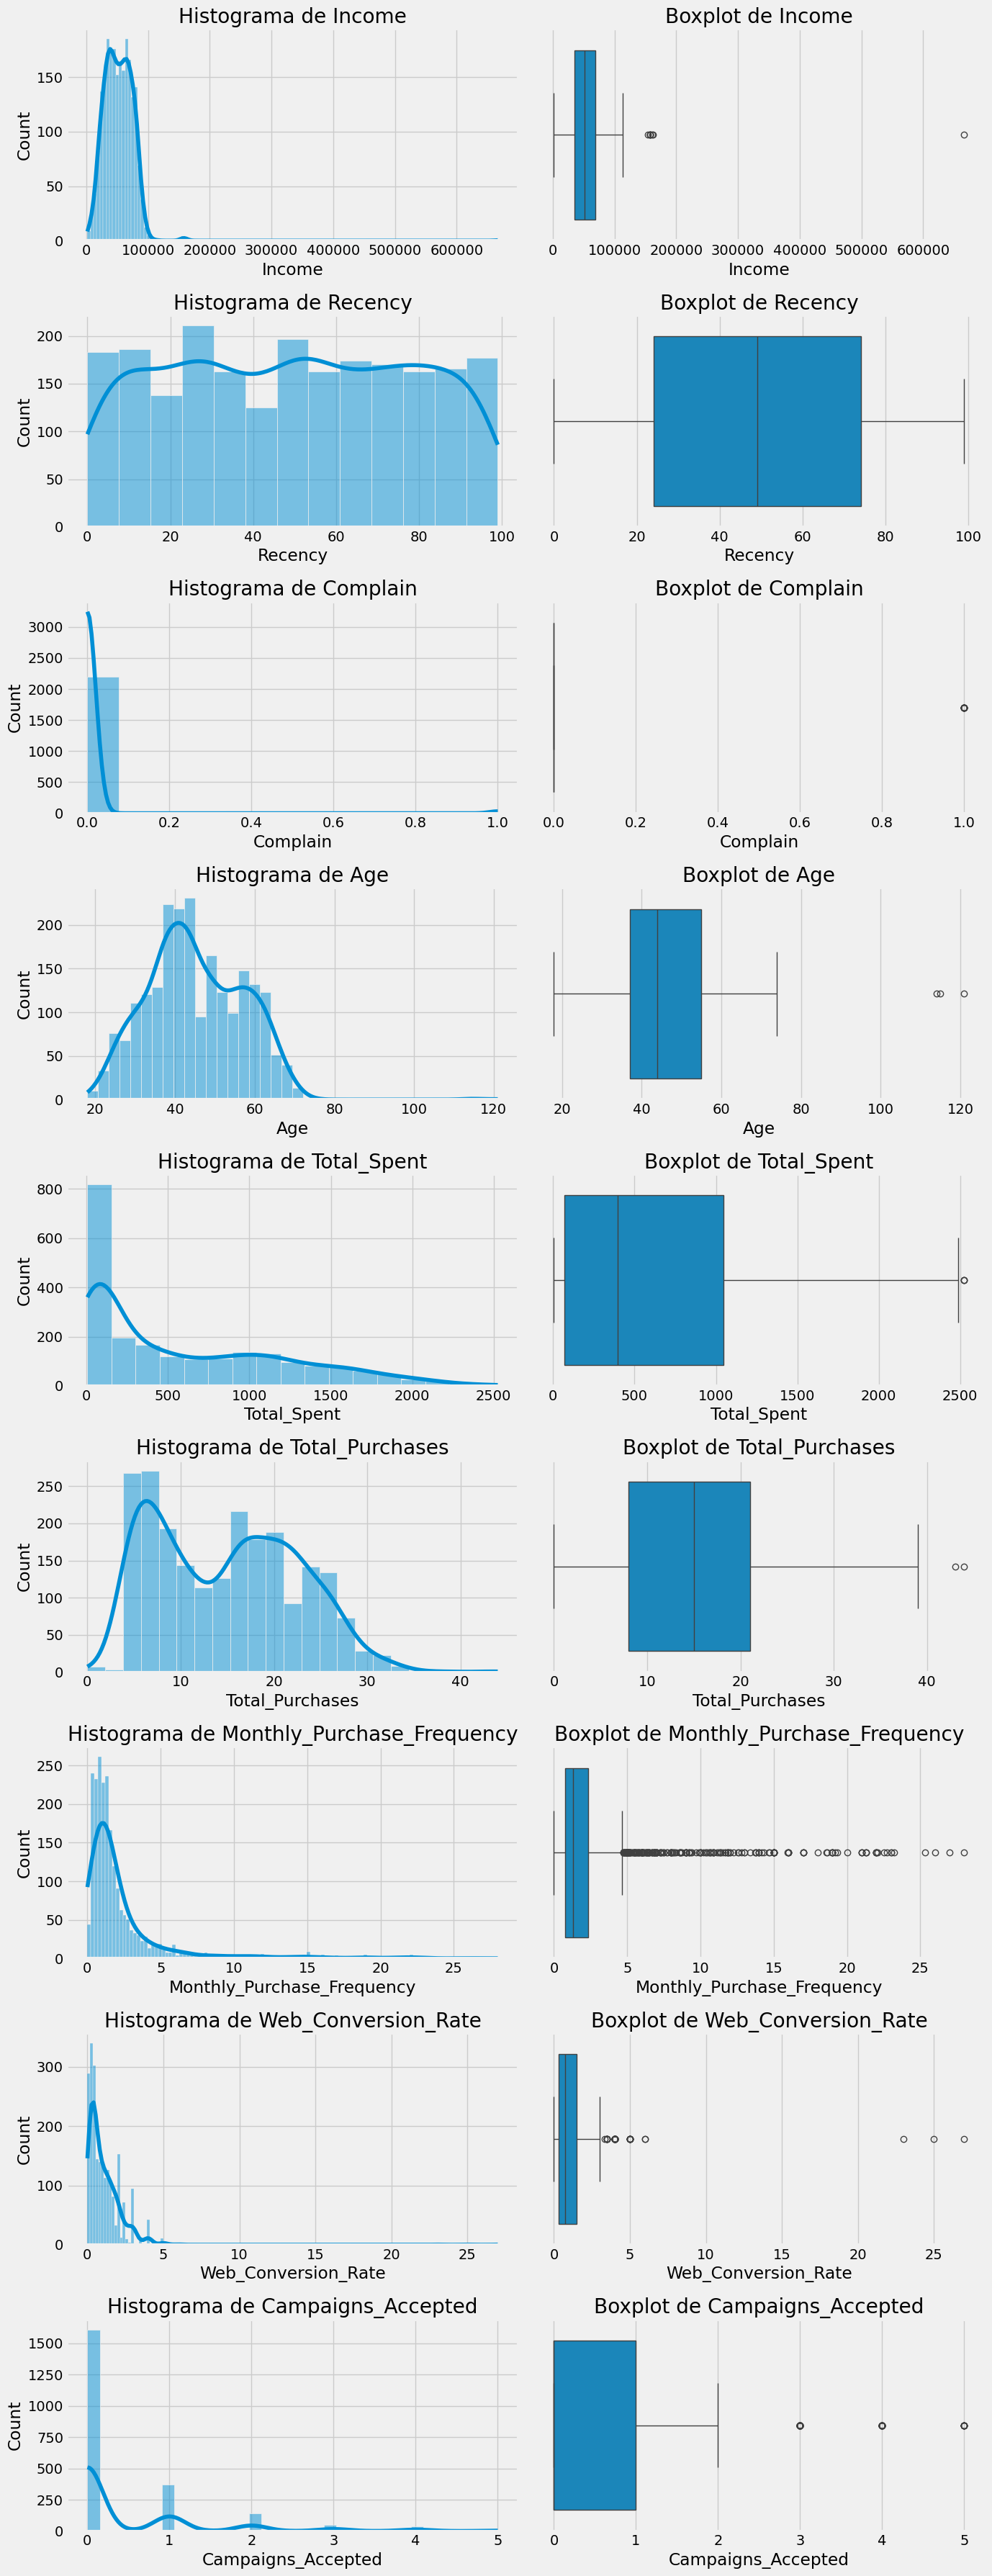

In [23]:
cols_to_analyze = ["Income", "Recency", "Complain", "Age", "Total_Spent", "Total_Purchases", "Monthly_Purchase_Frequency", "Web_Conversion_Rate", "Campaigns_Accepted"]

nrows = len(cols_to_analyze)
fig, ax = plt.subplots(nrows, 2, figsize=(14, nrows*4))

for i, col in enumerate(cols_to_analyze):
    sns.histplot(x=df[col], kde=True, ax=ax[i][0])
    ax[i][0].set_title(f'Histograma de {col}')
    
    sns.boxplot(x=df[col], ax=ax[i][1])
    ax[i][1].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [24]:
print(df[df["Income"] > 600000].shape[0])
print(df[df["Age"]>90].shape[0])

1
3


**Observaciones:**

- **`Income`**: Se detecta un *outlier* extremo claramente alejado del resto (666,666), que distorsiona la escala del histograma y el boxplot. Este valor será eliminado. Los ingresos bajos, aunque dispersos, parecen plausibles y se mantendrán.

- **`Recency`**: No se observan *outliers* evidentes. La distribución es razonable, por lo que no se requiere limpieza en esta variable.

- **`Age`**: Hay varios valores anómalos, como 121 años, que resultan poco creíbles. Se eliminarán estos 3 *outliers* para mejorar la calidad del análisis.

- **`Total_Spent` y `Total_Purchases`**: Aunque hay cierta dispersión, la mayoría de los valores siguen una tendencia descendente sin valores anómalos destacados. No se realizarán modificaciones aquí.

- **`Monthly_Purchase_Frequency`** y **`Web_Conversion_Rate`**: Ambos presentan varios *outliers*, aunque los valores en sí son posibles (por ejemplo, clientes extremadamente frecuentes o con conversión web muy alta). Se optará por mantenerlos para no perder comportamientos valiosos.


In [25]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [26]:
print(df.Income.max())
print(df.Age.max())

162397.0
74


In [27]:
df.sample(5)

,Education,Marital_Status,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,Prop_Wines,Prop_Fruits,Prop_Meat,Prop_Fish,Prop_Sweet,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted
1730,Postgraduate,Partnered,46910.0,36,0,50,98,2,3,68,0.705882,0.000000,0.205882,0.000000,0.000000,0.088235,7,0.285714,0.000000,0.428571,0.285714,2.142857,0.333333,0
1110,Graduate,Single,76773.0,79,0,60,489,0,0,1156,0.446367,0.048443,0.388408,0.074394,0.028547,0.013841,16,0.125000,0.125000,0.687500,0.062500,0.981595,2.000000,0
1395,Postgraduate,Partnered,63915.0,2,0,58,334,2,3,789,0.788340,0.008872,0.145754,0.038023,0.000000,0.019011,23,0.260870,0.130435,0.521739,0.086957,2.065868,1.200000,0
1276,Postgraduate,Partnered,37368.0,4,0,39,195,1,2,30,0.100000,0.066667,0.366667,0.066667,0.066667,0.333333,4,0.250000,0.000000,0.500000,0.250000,0.615385,0.166667,1
300,Graduate,Single,35246.0,53,0,56,74,2,2,62,0.580645,0.000000,0.193548,0.032258,0.032258,0.161290,11,0.272727,0.090909,0.272727,0.363636,4.459459,0.600000,0


Ya hemos eliminado estos outliers. Además, al revisar los valores máximos actuales en 'Income' y 'Age', podemos confirmar que la limpieza fue adecuada, gaudaremos el dataset limpio para su posterior análisis:

In [28]:
df.to_csv("../data/clean_dataset.csv", index = False)

**Con esto, hemos completado:**

- Limpieza de valores nulos y duplicados
- Tratamiento de outliers
- Revisión de tipos de datos
- Ingeniería de características
- Corrección de inconsistencias

Ahora podemos avanzar a la siguiente fase: **el Análisis Exploratorio de Datos (EDA).**
